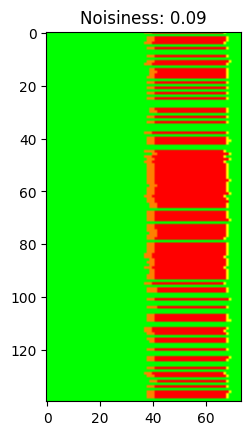

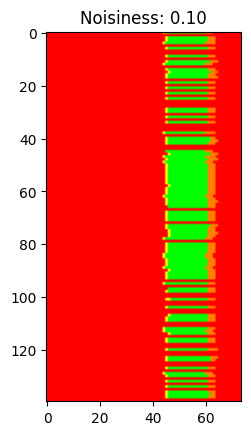

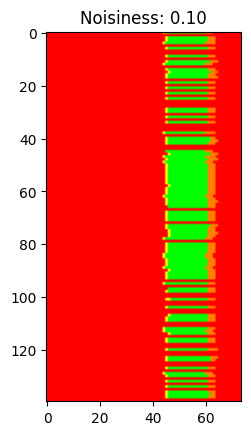

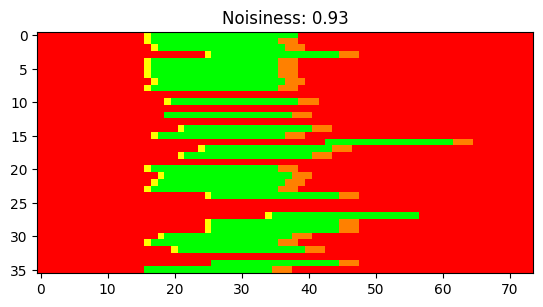

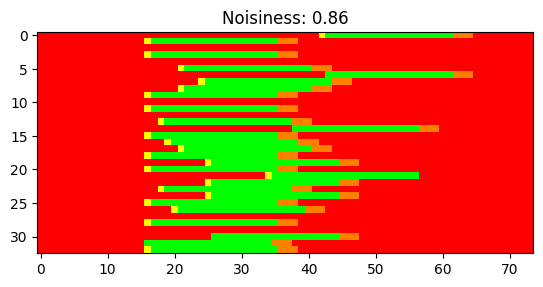

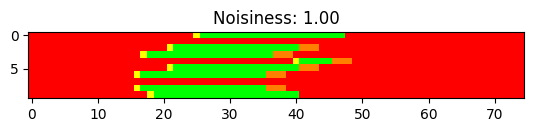

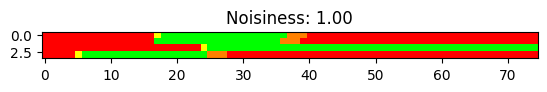

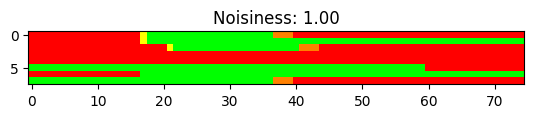

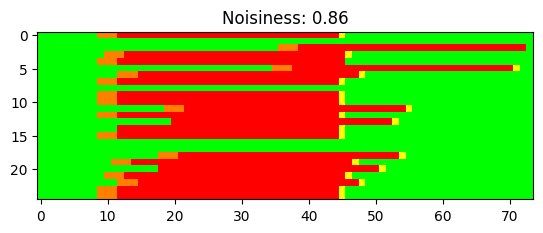

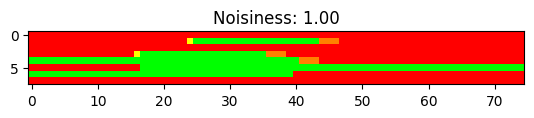

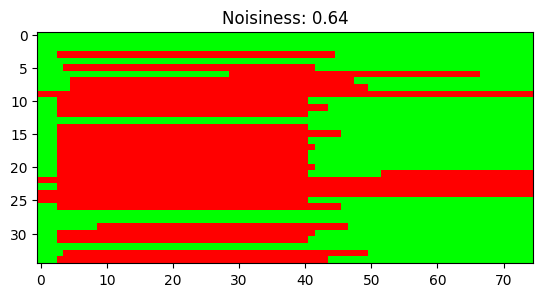

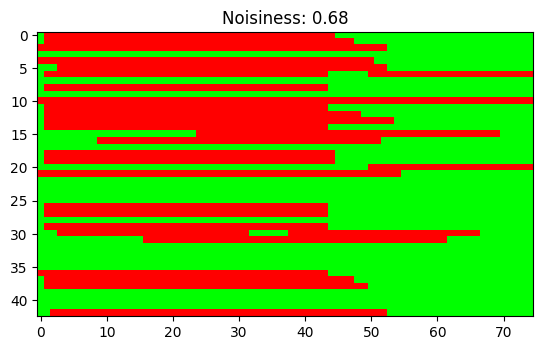

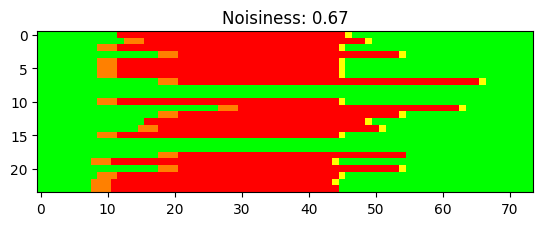

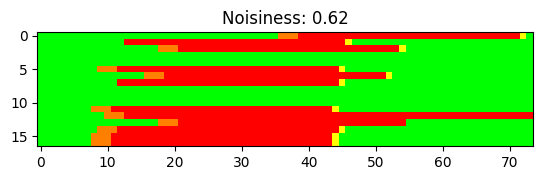

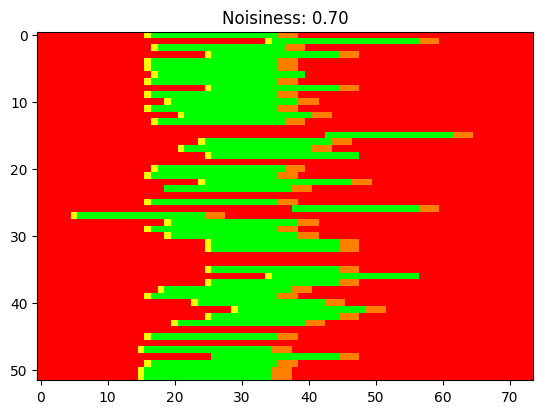

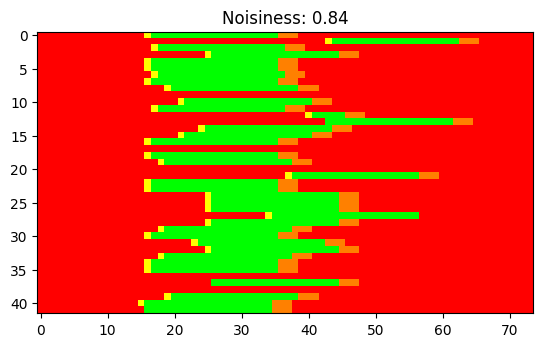

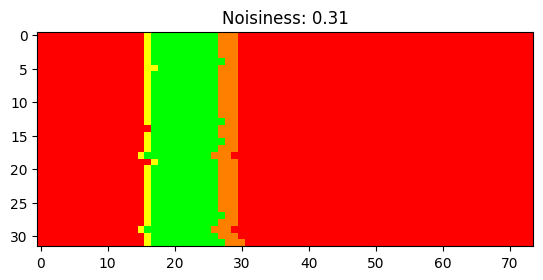

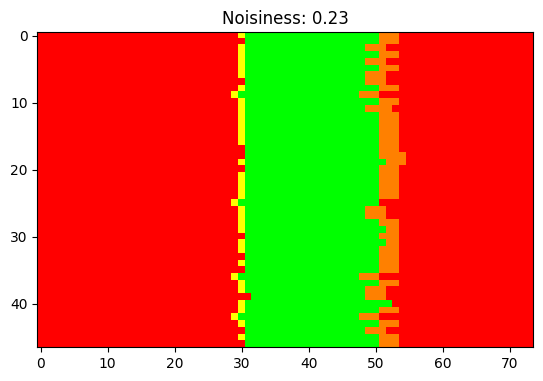

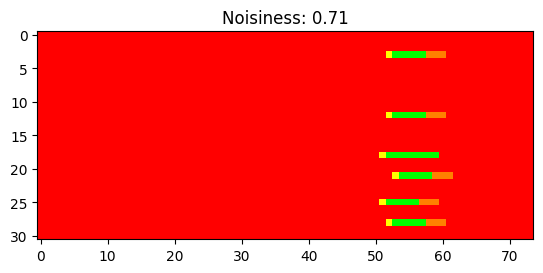

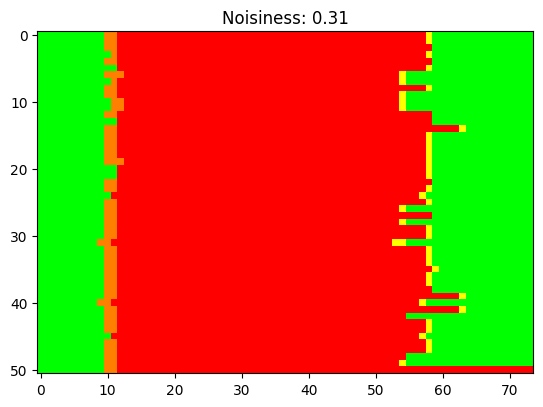

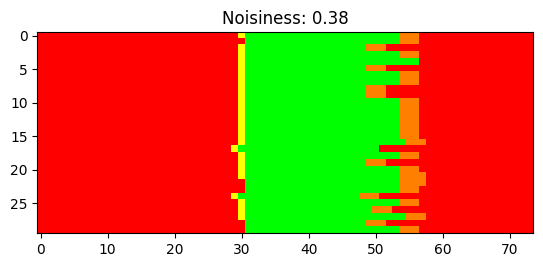

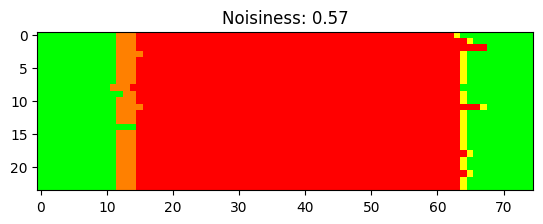

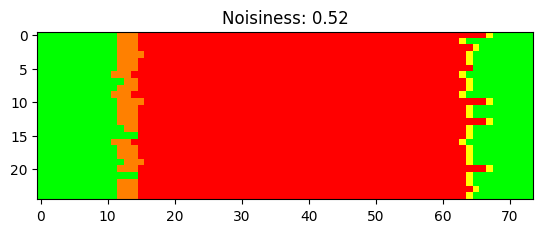

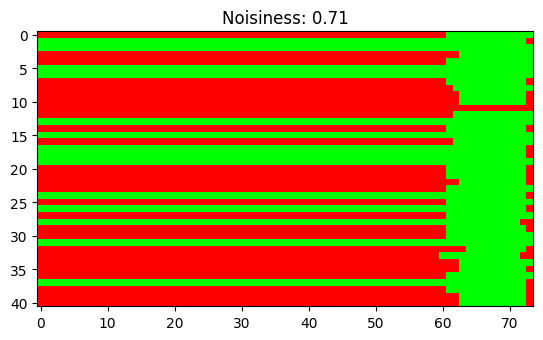

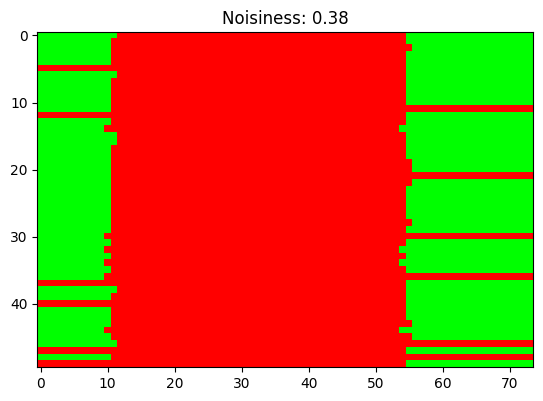

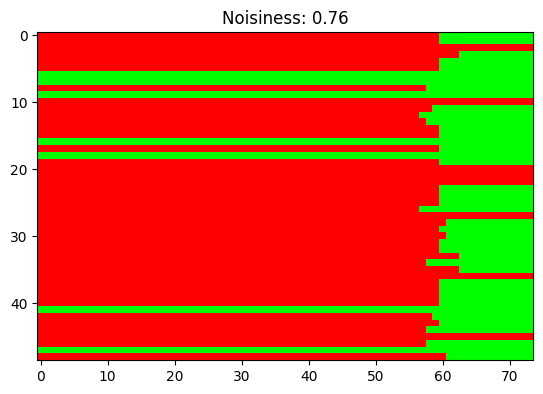

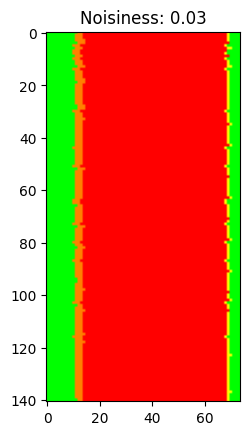

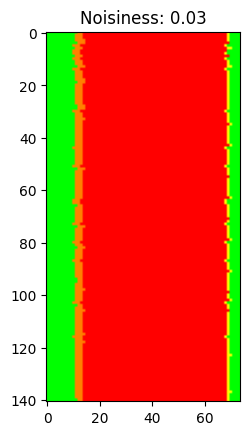

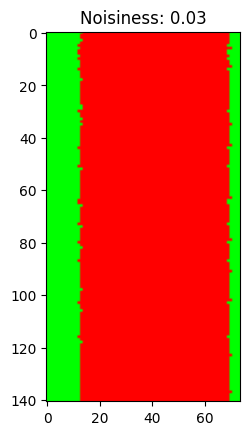

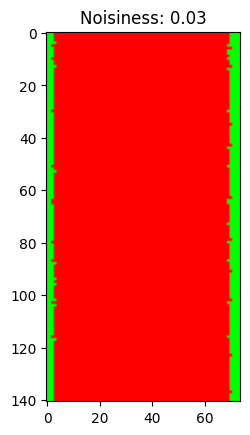

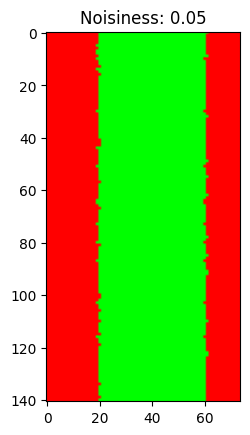

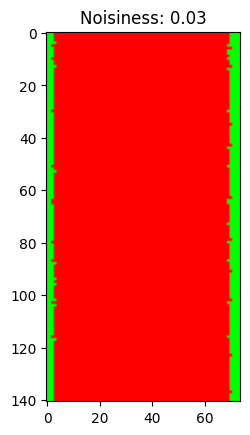

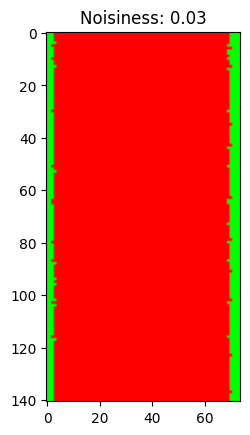

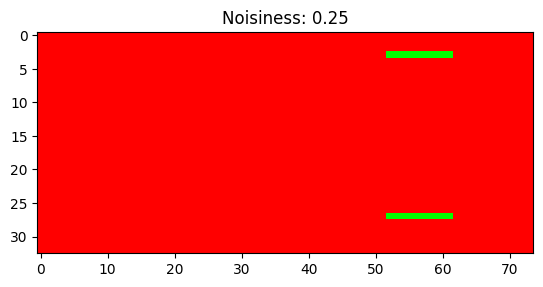

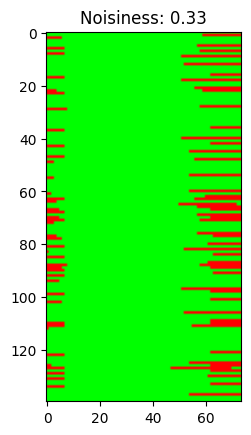

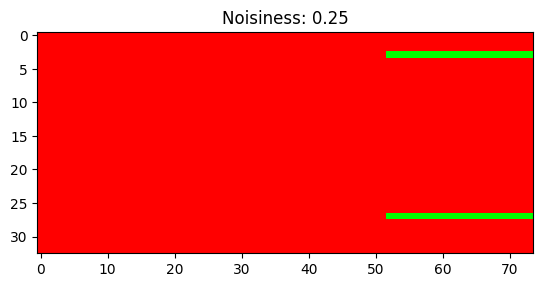

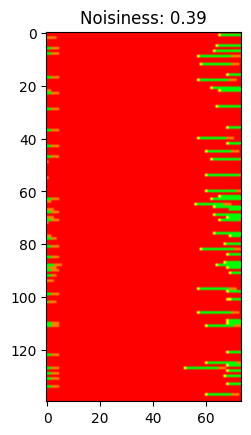

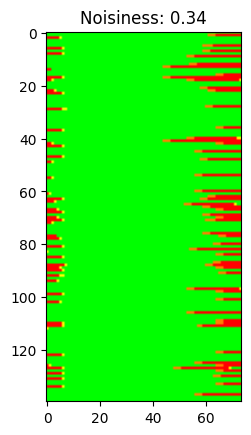

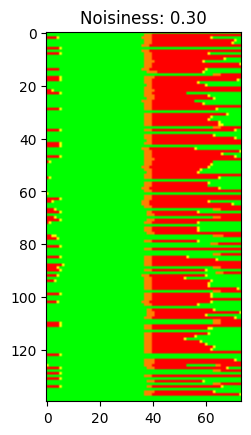

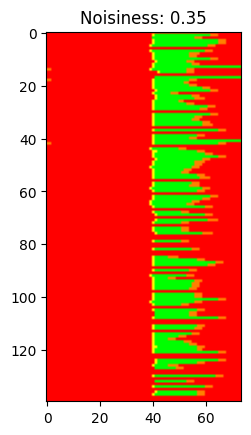

KeyboardInterrupt: 

In [23]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 	Color encoding:
#	0 = dark
#	1 = red
#	2 = amber
#	3 = green
#	4 = red amber
#	5 = amber flashing
#	6 = green flashing

color_rgb_map = {
    0: (0, 0, 0),
    1: (255, 0, 0),
    2: (255, 128, 0),
    3: (0, 255, 0),
    4: (255, 255, 0),
    5: (255, 255, 0),
    6: (0, 255, 0),
}

green_states_rgb_map = {
    0: (0, 0, 0),
    1: (0, 255, 0),
}

# Iterate over the json files in /outputs directory and plot the results

for filename in os.listdir("outputs"):
    if ".json" not in filename:
        continue
    with open("outputs/" + filename) as f:
        data = json.load(f)
    key = filename.replace(".json", "")
    fuzzyness = data["Fuzzyness"]
    dense_green_states = data["DenseGreenStates"]
    cycles = data["Cycles"]
    cycle_result_rows = []
    for cycle in cycles:
        results_string = cycle["Results"]
        results_string = results_string.replace("[", "")
        results_string = results_string.replace("]", "")
        results = results_string.split(" ")
        colors = [color_rgb_map[int(result)] for result in results]
        cycle_result_rows.append(colors)
    shortest_cycle_length = min([len(c) for c in cycle_result_rows])
    cycles_reconstructed = [c[:shortest_cycle_length] for c in cycle_result_rows]
    green_state_colors = []
    current_row = []
    for green_state in dense_green_states:
        current_row.append(green_states_rgb_map[int(green_state)])
        if len(current_row) % 100 == 0:
            if len(current_row) == 100:
                green_state_colors.append(current_row)
                current_row = []
    # plt.imshow(green_state_colors)
    # plt.show()
    """ try:
        img = mpimg.imread(f'outputs/{key}_signal.png')
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
        img = mpimg.imread(f'outputs/{key}_freq.png')
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        continue """
    plt.title(f"Noisiness: {fuzzyness:.2f}")
    plt.imshow(cycles_reconstructed)
    plt.show()
        
    
    
